# ML Base introduce
- Perceptron
- linear regression & logistic regression
- CNN
- RNN
- DNN

## by Cloud.yu 2018-2-9

# Perceptron  (感知机)

>感知机模型: $f(x)=sign(wx+b)$, 其中$w$叫做权重(weight)， $b$叫做偏置(bias)

>线性几何平面: $wx+b=0$

- PLA
- Pocket


----
# PLA  (Percetron Learning Algorithm)
----
- **Input**: traing data ($T = \{(x_{0}, y_{0}), (x_{1}, y_{1}), ..., (x_{i}, y_{i})\}$) 
- **Output**: $(w, b)$
    - init $(w, b)\rightarrow(0,0)$ , $i\rightarrow 0$
    - while $i != len(T)$ do
        - if $y_{i}(wx_{i}+b) <= 0$ then
            - $(w, b) \rightarrow (w, b) + y_{i}x_{i}$
            - $i\rightarrow 0$
        - else
            - $i=i+1$
        - end if
    - end while
----



![](pla.png)

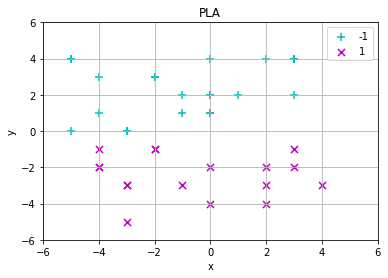

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

LEN = 40
x = np.random.randint(-5,5, (LEN,2))
line = np.random.randint(-5,5, (2, 1))
#  2y - 3x
label = np.sign(np.dot(x, line))
label[label == 0] = 1
fig = plt.figure(1)
idx_0 = np.where(label[:, 0] == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label[:, 0] == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('PLA')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)
plt.show()

In [3]:
cnt = 0
pla = np.zeros((2,1))
_update = 0

while cnt<LEN:
    _update = np.sign(np.dot(x[cnt,:], pla)) * label[cnt, 0]
    if _update <= 0:
        _x = x[cnt, :]
        _x.shape = (1,2)
        _x = np.transpose(_x)
        pla = pla + _x*label[cnt, 0]
        cnt = 0
    else:
        cnt = cnt+1
        continue
print(pla)



    

[[-6.]
 [ 1.]]


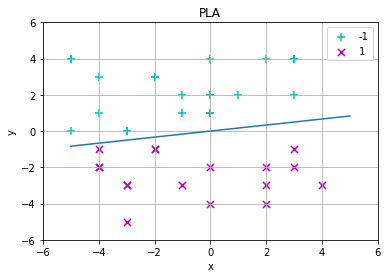

In [4]:
fig = plt.figure(1)
idx_0 = np.where(label[:, 0] == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label[:, 0] == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('PLA')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)

k = -pla[1,:] / pla[0,:]
line_x = np.linspace(-5,5,50) 
line_y = k*line_x
plt.plot(line_x,line_y)
plt.show()

----
# POCKET Algorithm
----
- **Input**: traing data ($T = \{(x_{0}, y_{0}), (x_{1}, y_{1}), ..., (x_{i}, y_{i})\}$)
- **Output**: $(w, b)$
    - init $(w_{best}, b_{best}) \rightarrow random$
    - $loss_{min} \leftarrow sum(sign(w_{best}x + b_{best}) != y)$
    - for $i= 0\rightarrow1000$ do
        - init $(w, b)\rightarrow random$ and $j\rightarrow 0$
        - Save error label data to $T_{error} = \{(x_{0}, y_{0}), (x_{1}, y_{1}), ..., (x_{err}, y_{err})\}$
        - while $j != len(T_{error})$ do
            - $(\bar{w}, \bar{b}) \rightarrow (w, b) + y_{j}x_{j}$
            - $loss \leftarrow sum(sign(\bar{w}x + \bar{b}) != y)$
            - if $loss < loss_{min}$ then
                - break
            - end if
            - $j=j+1$
        - end while
        - if $j != len(y_{err})$
           - $(w_{best}, b_{best}) \leftarrow (\bar{w}, \bar{b})$
           - $loss_{min} \leftarrow loss$
        - end if
        - j = 0
    - end for
----

In [6]:
def cal_loss(_pocket, _x, _label):
    _cal = np.sign(np.dot(_x, _pocket))
    _cal.shape = (40,1)
    idx = np.where(_cal[:, 0] != _label[:, 0])
    loss = np.sum(_cal[:, 0] != _label[:, 0])
    return list(idx[0]), loss

# random init best pocket and min loss value
pocket_best = np.random.randint(-5,5, (2,1))
_, min_loss = cal_loss(pocket_best, x, label)


for i in range(15):
    # random pocket and cur loss for each period
    pocket = np.random.randint(-5,5, (2,1))
    _pocket = pocket
    idx, cur_loss = cal_loss(pocket, x, label)
    while cnt < len(idx):
        _x = x[idx[cnt], :]
        _x.shape = (2,1)
        _pocket = pocket + _x * label[idx[cnt], 0]
        _, cur_loss = cal_loss(_pocket, x, label)
        # compare cur loss with min loss
        if cur_loss < min_loss:
            break
        else:
            cnt = cnt + 1
    if cnt != len(idx):
        pocket_best = _pocket
        _, min_loss = cal_loss(pocket_best, x, label)
    cnt = 0

pocket = pocket_best
print(pocket)

[[-6]
 [ 1]]


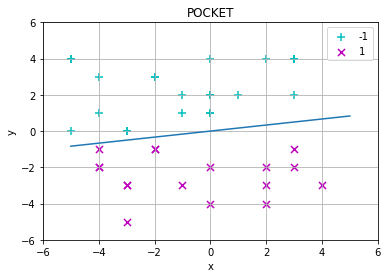

In [7]:
fig = plt.figure(1)
idx_0 = np.where(label[:, 0] == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label[:, 0] == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('POCKET')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)

k = -pocket[1,:] / pocket[0,:]
line_x = np.linspace(-5,5,50) 
line_y = k*line_x
plt.plot(line_x,line_y)
plt.show()